## Wstępna analiza eksploracyjna ramki danych: winequality-red
### Piotr Wilczyński

## 1. Wstęp

Zaimportujmy niezbędne biblioteki i ustawmy rozmiar wyświetlanych wykresów.

In [362]:
options(repr.plot.width=3, repr.plot.height=3)
library(ggplot2)
library(dplyr)

Ramka danych opisuje właściwości fizykochemiczne i sensoryczne portugalskiego wina czerwonego "Vinho Verde".  Zaimportujmy ją.

In [363]:
df <- read.csv("winequality-red.csv")

Podejrzyjmy kilka pierwszych wierszy.

In [364]:
head(df)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Sprawdźmy rozmiar ramki.

In [365]:
dim(df)

[1] 1599   12

Jak widać ramka zawiera 12 kolumn i 1599 wierszy. Zobaczmy, jakie zawiera kolumny.

In [366]:
colnames(df)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

Sprawdźmy jeszcze, czy są jakieś braki w danych.

In [367]:
sum(is.na(df))

[1] 0

Ramka nie ma żadnych barkujących danych. Przeanalizujmy jej kolumny.

## 2. Analiza kolumn

Z racji na to, że analizując kolmny będziemy sprawdzali te same ich własności, napiszemy funkcje, które przedstawią niebędne informacje.

In [368]:
# funkcja wypisująca typ zmiennych, liczbę unikalnych wartości, minimum, maksimum,
# medianę i średnią arytmetyczną
printColDetails <- function(x){
    print(paste0("typ zmiennych w kolumnie: ", typeof(x)))
    print(paste0("liczba unikalnych wartości: ",length(unique(x))))
    print(paste0("wartość minimalna: ", min(x)))
    print(paste0("wartość maksymalna: ", max(x)))
    print(paste0("mediana: ", median(x)))
    print(paste0("średnia arytmetyczma: ", mean(x)))
}

In [369]:
# funkcja rysująca histogram warotści
drawHist <- function(x){
    ggplot(data.frame(x = x), aes(x = x)) +
        geom_histogram(bins = 10)
}

Dla każdej z kolumn będziemy sprawdzać podstawowe informacje takie jak: typ zminnych, liczba unikalnych wartości, minimum, maksiumum, mediana i średnia arytmetyczna. Dodatkowo będziemy rysowali rozkład wartości na histogramach. Będziemy również sprawdzać czy każda z kolumn ma rozkład zbliżony do normalnego. Dodatkowo przy każdej z kolumn będzie krótki opis zawartych w niej informacji.

### 2.1. fixed acidity

Kolumna zawiera informacje o kwasach stałych lub nielotnych związanych z winem.

In [370]:
printColDetails(df$fixed.acidity)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 96"
[1] "wartosc minimalna: 4.6"
[1] "wartosc maksymalna: 15.9"
[1] "mediana: 7.9"
[1] "srednia arytmetyczma: 8.31963727329581"


Wartości w kolumnie są z przediału od 4.6 do 15.9.

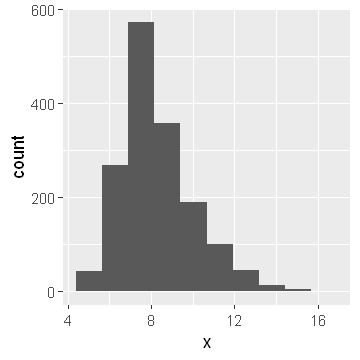

In [371]:
drawHist(df$fixed.acidity)

Zdecydowana większość wartości mieści się w przedziale między 6 a 10. Hisotgram przypomina rozkład normalny. Narysujmy zatem wykrs qq.

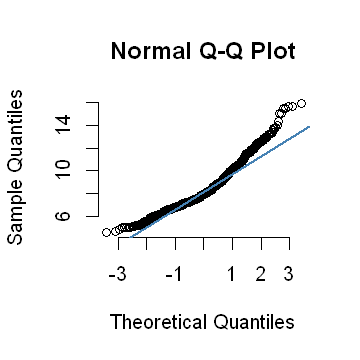

In [372]:
qqnorm(df$fixed.acidity, pch = 1, frame = FALSE)
qqline(df$fixed.acidity, col = "steelblue", lwd = 2)

Jak widzimy dane nie pokrywają się z liną zatem prawdopodobnie nie jest to rozkład normalny. Jest jednak podobny.

### 2.2. volatile acidity

Kolumna zawiera informacje o kwasach lotnych w winie.

In [373]:
printColDetails(df$volatile.acidity)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 143"
[1] "wartosc minimalna: 0.12"
[1] "wartosc maksymalna: 1.58"
[1] "mediana: 0.52"
[1] "srednia arytmetyczma: 0.527820512820513"


Wartości w kolumnie są z przediału od 0.12 do 1.58.

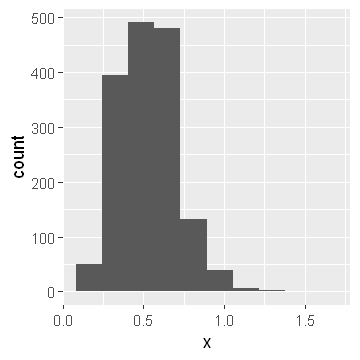

In [374]:
drawHist(df$volatile.acidity)

Zdecydowana większość wartości jest z przedziału 0.25 - 0.75. Sprawdźmy jak wygląda wykres qq.

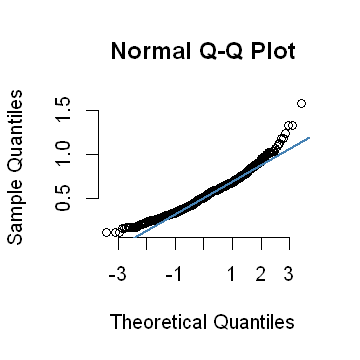

In [375]:
qqnorm(df$volatile.acidity, pch = 1, frame = FALSE)
qqline(df$volatile.acidity, col = "steelblue", lwd = 2)

Otrzymujemy rozkład nieco odbiegający, jednak mogący przypominać rozkład normalny.

### 2.3. citric acid

Kolumna zawiera informacje o zawartości kwasu cytrynowego w winie.

In [376]:
printColDetails(df$citric.acid)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 80"
[1] "wartosc minimalna: 0"
[1] "wartosc maksymalna: 1"
[1] "mediana: 0.26"
[1] "srednia arytmetyczma: 0.270975609756098"


Wartości w kolumnie są z przediału od 0 do 1.

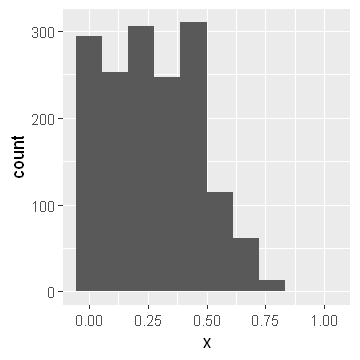

In [377]:
drawHist(df$citric.acid)

Widzimy, że ten rozkład różni się od poprzednich. Większość danych wydaję się być rozłożnoa niemal jednostajnie na przedziale 0 - 0.5. Rozkład zdecydowanie nie jest normalny.

### 2.4. residual sugar

Kolumna zawiera informacje na temat zawartości cukru w winie po fermentacji.

In [378]:
printColDetails(df$residual.sugar)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 91"
[1] "wartosc minimalna: 0.9"
[1] "wartosc maksymalna: 15.5"
[1] "mediana: 2.2"
[1] "srednia arytmetyczma: 2.53880550343965"


Wartości w kolumnie są z przediału od 0.9 do 15.5.

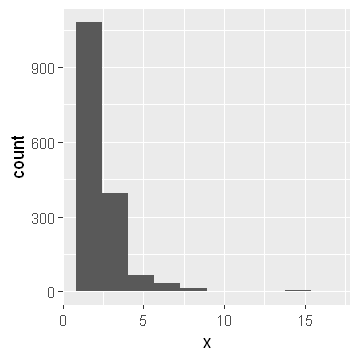

In [379]:
drawHist(df$residual.sugar)

Widzimy, że zdecydowana większość obserwacji mieści się w przedziale 0 - 5. Widzimy jednak, że są wyjątki. Znajdziemy wino z wartością 'residual.sugar' na poziomie 15.5. Znajdźmy informacje o nim:

In [380]:
df  %>% filter(residual.sugar == 15.5)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
10.6,0.28,0.39,15.5,0.069,6,23,1.0026,3.12,0.66,9.2,5


### 2.5. chlorides

Kolumna zawiera informacje na temat zawartości soli w winie.

In [381]:
printColDetails(df$chlorides)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 153"
[1] "wartosc minimalna: 0.012"
[1] "wartosc maksymalna: 0.611"
[1] "mediana: 0.079"
[1] "srednia arytmetyczma: 0.0874665415884928"


Wartości w kolumnie są z przediału od 0.012 do 0.611.

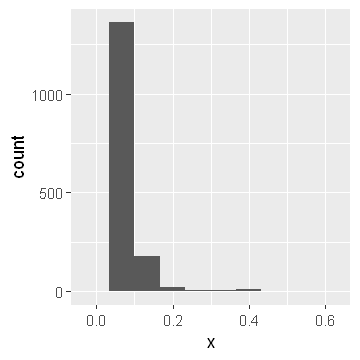

In [382]:
drawHist(df$chlorides)

Ponownie otrzymujemy rokład zupełnie różny od normalnego. Większość obserwacji jest zawarta na histogramie na jednym słupku. Są one z przedziału 0.0 - 0.1.

### 2.6. free sulfur dioxide

Kolumna informuje o zawartości wolnej formy SO2 w winie.

In [383]:
printColDetails(df$free.sulfur.dioxide)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 60"
[1] "wartosc minimalna: 1"
[1] "wartosc maksymalna: 72"
[1] "mediana: 14"
[1] "srednia arytmetyczma: 15.8749218261413"


Wartości w kolumnie są z przediału od 1 do 72.

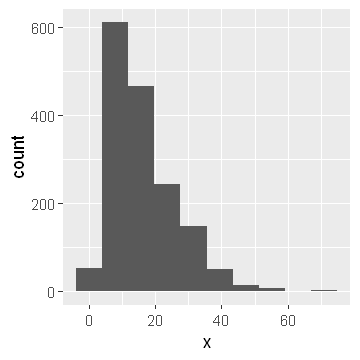

In [384]:
drawHist(df$free.sulfur.dioxide)

Większość z wartości znajduje się między 5 - 30. Widzimy, że prawie wszystkie obserwację mają wartość 'free.sulfur.dioxide' większą od 5. Im ta wartość potem jest większa, tym mniej mamy obserwacji. Taki rozkład raczej nie jest normalny. Na wszelki wypadek narysujmy wykres qq.

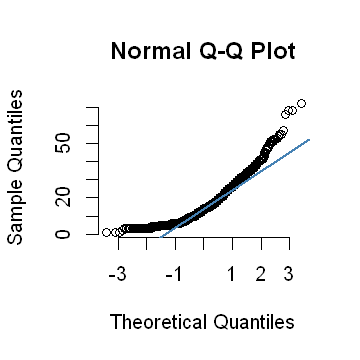

In [385]:
qqnorm(df$free.sulfur.dioxide, pch = 1, frame = FALSE)
qqline(df$free.sulfur.dioxide, col = "steelblue", lwd = 2)

Rokład nie jest normalny. Punkty na wykresie nie pokrywają się z linią.

### 2.7. total sulfur dioxide

Kolumna informuje o całkowitej zawartości SO2 w winie.

In [386]:
printColDetails(df$total.sulfur.dioxide)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 144"
[1] "wartosc minimalna: 6"
[1] "wartosc maksymalna: 289"
[1] "mediana: 38"
[1] "srednia arytmetyczma: 46.4677923702314"


Wartości w kolumnie są z przediału od 6 do 289.

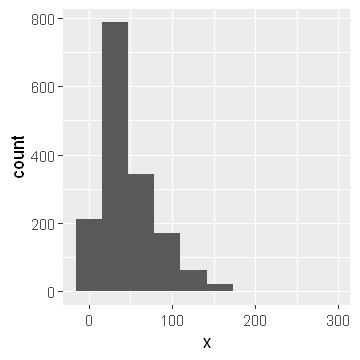

In [387]:
drawHist(df$total.sulfur.dioxide)

Większość wartości zawiera się między 25 a 50. Narysujmy wykres qq

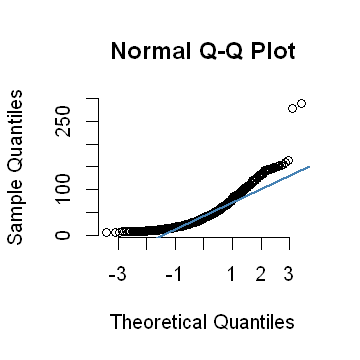

In [388]:
qqnorm(df$total.sulfur.dioxide, pch = 1, frame = FALSE)
qqline(df$total.sulfur.dioxide, col = "steelblue", lwd = 2)

Rokład nie jest normalny. Punkty na wykresie nie pokrywają się z linią.

### density

Kolumna zawiera informacje o gęstości wina.

In [389]:
printColDetails(df$density)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 436"
[1] "wartosc minimalna: 0.99007"
[1] "wartosc maksymalna: 1.00369"
[1] "mediana: 0.99675"
[1] "srednia arytmetyczma: 0.996746679174484"


Wartości w kolumnie są z przediału od 0.99007 do 1.00369.

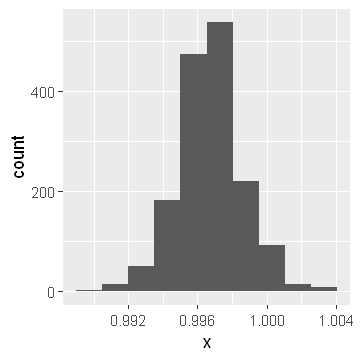

In [390]:
drawHist(df$density)

Wszystkie wartości są bliskie 1. Na pierwszy rzut oka, rozkład bardzo przypomina normalny. Narysujmy wykres qq.

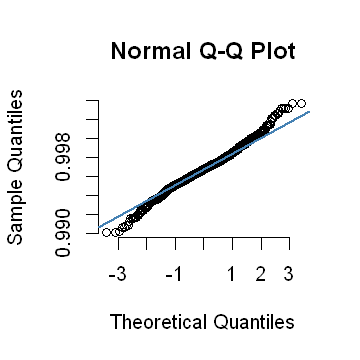

In [391]:
qqnorm(df$density, pch = 1, frame = FALSE)
qqline(df$density, col = "steelblue", lwd = 2)

Rozkład jest zbliżony do rozkładu normalnego. W dużej mierze punkty pokrywają się z linią.

### 2.8. pH

Kolumna zawierająca informację o ph wina.

In [392]:
printColDetails(df$pH)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 89"
[1] "wartosc minimalna: 2.74"
[1] "wartosc maksymalna: 4.01"
[1] "mediana: 3.31"
[1] "srednia arytmetyczma: 3.31111319574734"


Wartości w kolumnie są z przediału od 2.74 do 4.01. Zatem wszystkie wina mają odczyn kwasowy.

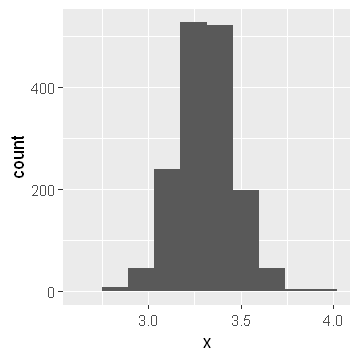

In [393]:
drawHist(df$pH)

Ponownie histogram przypomina rozkład normalny, ze średnią nieco większą niż 3.25. Narysujmy wykres qq.

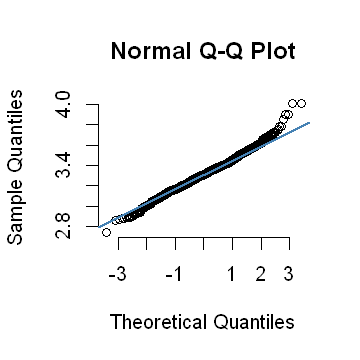

In [394]:
qqnorm(df$pH, pch = 1, frame = FALSE)
qqline(df$pH, col = "steelblue", lwd = 2)

Rozkład jest bardzo zbliżony do rozkładu normalnego. W dużej mierze punkty pokrywają się z linią.

### 2.9. sulphates 

Kolumna zawiera informacje o zawartości siarczanów w winie.

In [395]:
printColDetails(df$sulphates)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 96"
[1] "wartosc minimalna: 0.33"
[1] "wartosc maksymalna: 2"
[1] "mediana: 0.62"
[1] "srednia arytmetyczma: 0.658148843026892"


Wartości w kolumnie są z przediału od 0.33 do 2.

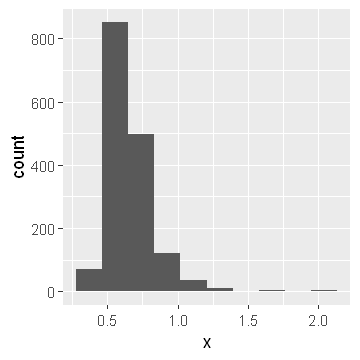

In [396]:
drawHist(df$sulphates)

Większość z obserwacji jest w pobliżu mediany. Są jednak odbiegające obserwacje z wartościami powyżej 1.5. Znajdźmy je.b

In [397]:
df  %>% filter(sulphates > 1.5)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.8,0.610,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5
8.6,0.490,0.28,1.9,0.110,20,136,0.9972,2.93,1.95,9.9,6
8.6,0.490,0.28,1.9,0.110,20,136,0.9972,2.93,1.95,9.9,6
8.6,0.490,0.29,2.0,0.110,19,133,0.9972,2.93,1.98,9.8,5
9.2,0.520,1.00,3.4,0.610,32,69,0.9996,2.74,2.00,9.4,4
7.5,0.705,0.24,1.8,0.360,15,63,0.9964,3.00,1.59,9.5,5
8.9,0.590,0.50,2.0,0.337,27,81,0.9964,3.04,1.61,9.5,6
7.1,0.310,0.30,2.2,0.053,36,127,0.9965,2.94,1.62,9.5,5


Narysujmy wykres qq.

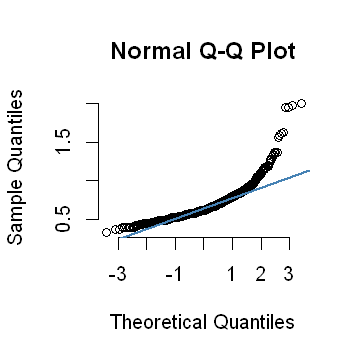

In [398]:
qqnorm(df$sulphates, pch = 1, frame = FALSE)
qqline(df$sulphates, col = "steelblue", lwd = 2)

Rokład nie jest normalny. Punkty na wykresie nie pokrywają się z linią.

### 2.10. alcohol

Kolumna zawiera informacje o zawartości alkoholu w winie.

In [399]:
printColDetails(df$alcohol)

[1] "typ zmiennych w kolumnie: double"
[1] "liczba unikalnych wartosci: 65"
[1] "wartosc minimalna: 8.4"
[1] "wartosc maksymalna: 14.9"
[1] "mediana: 10.2"
[1] "srednia arytmetyczma: 10.4229831144465"


Wartości w kolumnie są z przediału od 8.4 do 14.9.

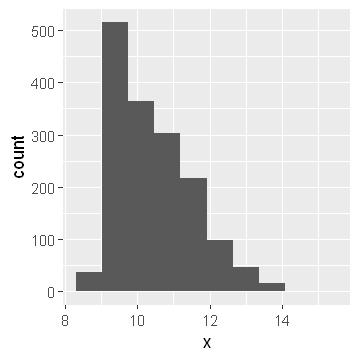

In [400]:
drawHist(df$alcohol)

Już na histogramie widać, że rozkład nie jest normalny. Niewiele win zawiera mniej niż 9% alkoholu. Wiele z nich natomiast ma alkohol na poziomie 9-10%. Powyżej 10% wraz ze wzrostem ilości alkoholu w winach spada ich liczba. 

### 2.11. quality

Kolumna zawiera ocenę jakości wina w skali od 0 do 10.

In [401]:
printColDetails(df$quality)

[1] "typ zmiennych w kolumnie: integer"
[1] "liczba unikalnych wartosci: 6"
[1] "wartosc minimalna: 3"
[1] "wartosc maksymalna: 8"
[1] "mediana: 6"
[1] "srednia arytmetyczma: 5.63602251407129"


Wartości w kolumnie są liczbami całkowitymi z przediału od 3 do 8. Skoro w tym przypadku mamy do czynienia z liczbami całkowitymi zamiast rysować histogram, stwórzmy tabelę.

In [402]:
table(df$quality)


  3   4   5   6   7   8 
 10  53 681 638 199  18 

Większość z win otrzymała ocenę 5 lub 6. Trochę mniej otrzymało ocenę 7. W skrajnych przypadkach wino było oceniane na 3 i 8, kiedy było bardzo złe lub wybitnie dobre.

## 3. Korelacja między zmiennymi

Wyznaczmy macierz korelacji między zmiennymi. Nie będziemy brali pod uwagę kolumny 'quality', ponieważ ją powinniśmy traktować raczej jako zmienną kategoryczną (mimo tego, że jest przedstawiana w postaci liczby).

In [403]:
cor(df  %>% select(-quality))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.00000000,-0.256130895,0.67170343,0.114776724,0.093705186,-0.153794193,-0.11318144,0.66804729,-0.68297819,0.183005664,-0.06166827
volatile.acidity,-0.25613089,1.000000000,-0.55249568,0.001917882,0.061297772,-0.010503827,0.07647000,0.02202623,0.23493729,-0.260986685,-0.20228803
citric.acid,0.67170343,-0.552495685,1.00000000,0.143577162,0.203822914,-0.060978129,0.03553302,0.36494718,-0.54190414,0.312770044,0.10990325
residual.sugar,0.11477672,0.001917882,0.14357716,1.000000000,0.055609535,0.187048995,0.20302788,0.35528337,-0.08565242,0.005527121,0.04207544
chlorides,0.09370519,0.061297772,0.20382291,0.055609535,1.000000000,0.005562147,0.04740047,0.20063233,-0.26502613,0.371260481,-0.22114054
free.sulfur.dioxide,-0.15379419,-0.010503827,-0.06097813,0.187048995,0.005562147,1.000000000,0.66766645,-0.02194583,0.07037750,0.051657572,-0.06940835
total.sulfur.dioxide,-0.11318144,0.076470005,0.03553302,0.203027882,0.047400468,0.667666450,1.00000000,0.07126948,-0.06649456,0.042946836,-0.20565394
density,0.66804729,0.022026232,0.36494718,0.355283371,0.200632327,-0.021945831,0.07126948,1.00000000,-0.34169933,0.148506412,-0.49617977
pH,-0.68297819,0.234937294,-0.54190414,-0.085652422,-0.265026131,0.070377499,-0.06649456,-0.34169933,1.00000000,-0.196647602,0.20563251
sulphates,0.18300566,-0.260986685,0.31277004,0.005527121,0.371260481,0.051657572,0.04294684,0.14850641,-0.19664760,1.000000000,0.09359475


Narysujmy ją teraz w taki sposób, który pokaże nam, na które miejsca w tabeli zwrócić uwagę

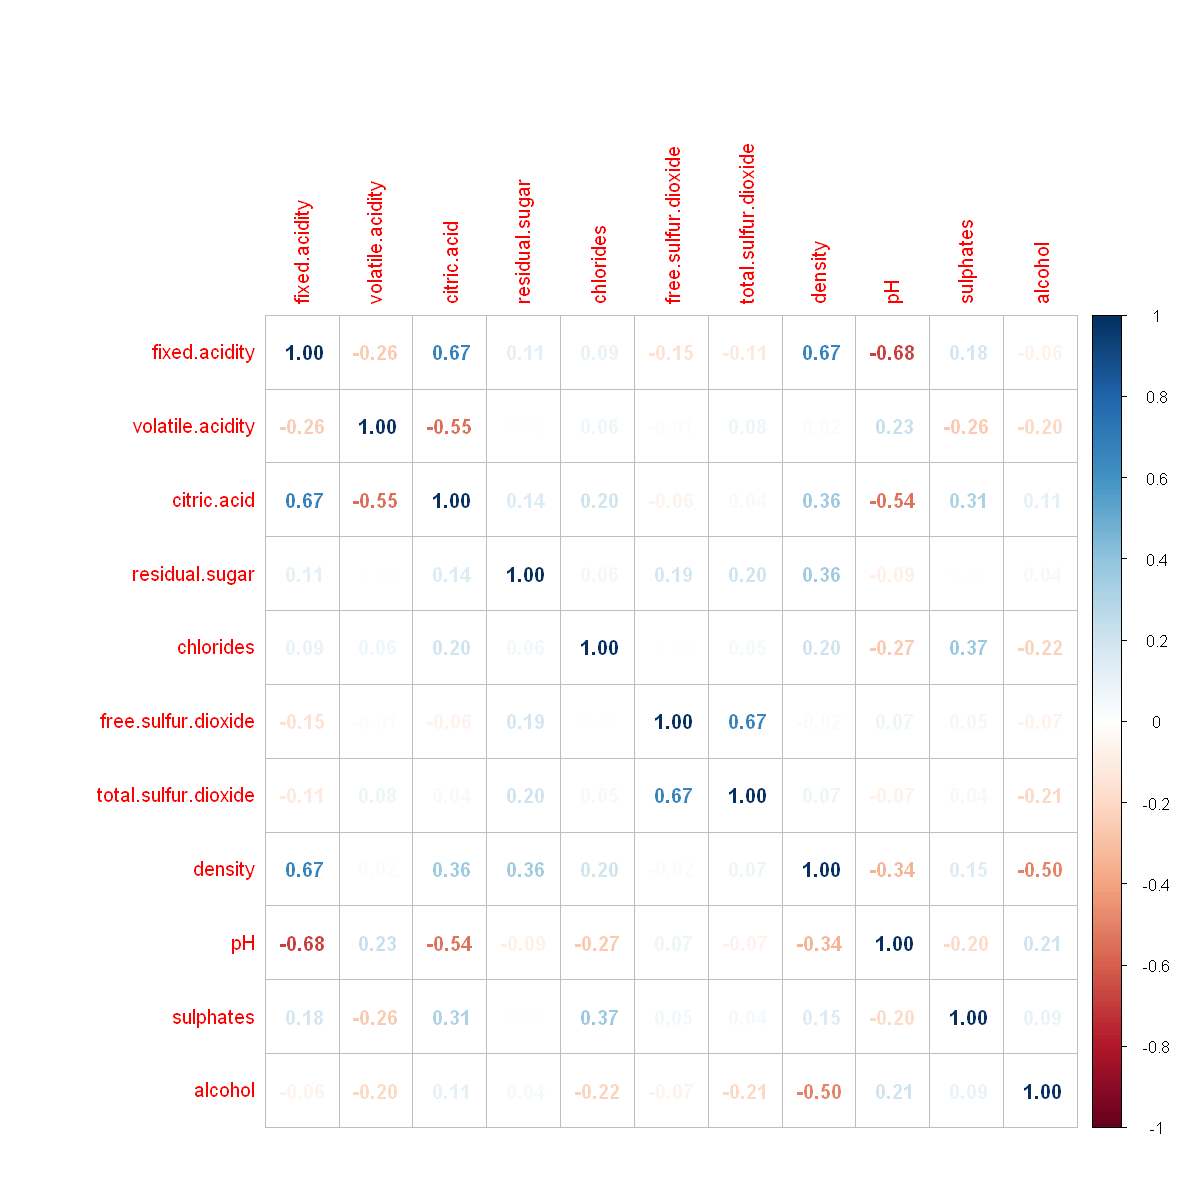

In [404]:
library("corrplot")
options(repr.plot.width=10, repr.plot.height=10)
corrplot(cor(df  %>% select(-quality)), method="number")

Będziemy analizować korelację zmiennych, między którymi współczynnik jest większy od 0.5 lub odpowiednio mniejszy od -0.5

Widzimy, że zmienna 'fixed.acidity' ma (względnie) wysoki współczynnik korelacji z 'citric.acid', 'density' i 'pH'. Narysujmy odpowienie scatter ploty, który pokażą nam, jak te wartości zależą od 'fixed.acidity'.

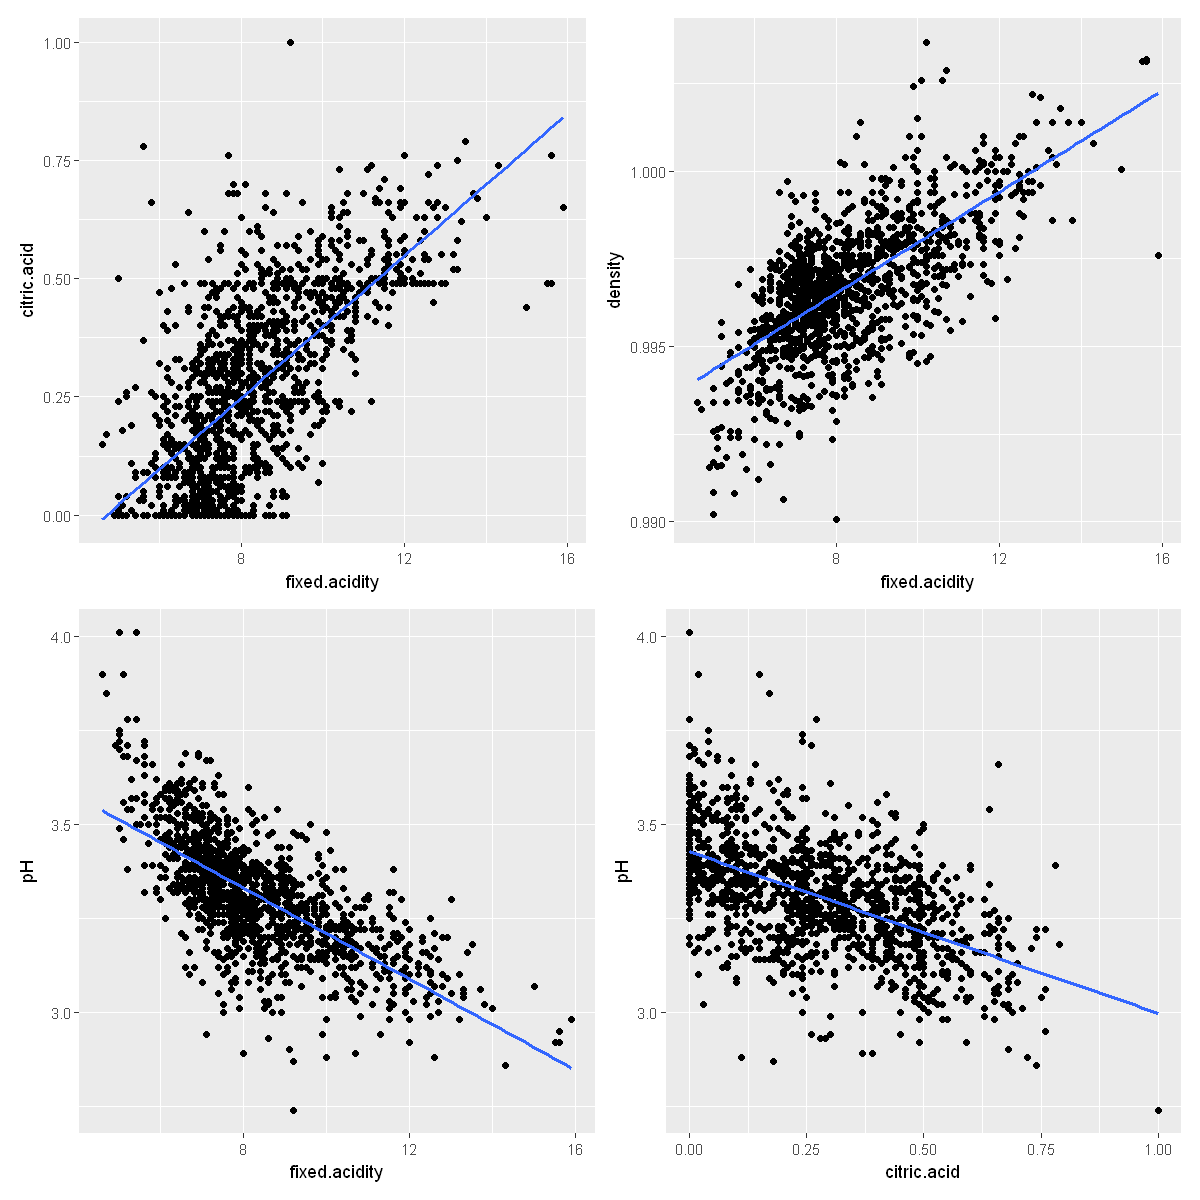

In [405]:
library(patchwork)
p1 <- ggplot(df, aes(x = fixed.acidity, y = citric.acid)) +
    geom_point() +
    geom_smooth(method= "lm", se = FALSE)
p2 <- ggplot(df, aes(x = fixed.acidity, y = density)) +
    geom_point() +
    geom_smooth(method= "lm", se = FALSE)
p3 <- ggplot(df, aes(x = fixed.acidity, y = pH)) +
    geom_point() +
    geom_smooth(method= "lm", se = FALSE)
p4 <- ggplot(df, aes(x = citric.acid, y = pH)) +
    geom_point() +
    geom_smooth(method= "lm", se = FALSE)
options(repr.plot.width=10, repr.plot.height=10)
(p1 + p2) / (p3 + p4)

Naturalnie, nie powinna dziwić zależność międzi 'fixed.acidity', a 'citric.acid'. Oba decydują o kwasowości wina. Nie dziwi również fakt, że kiedy 'fixed.acidity' i 'citric.acid' rosną, pH maleje, ponieważ im niższe pH, tym wino bardziej kwasowe.

W zbiorze danych mamy jeszcze jedną kolumnę, opisującą kwasowość wina: 'volatile.acidity'. Macierz korelacji wskazuje na pewne zależności tej zmiennej z 'citric.acid', ale na raczej brak związku z 'fixed.acidity'. Narysujmy dwa kolejne scatter ploty.

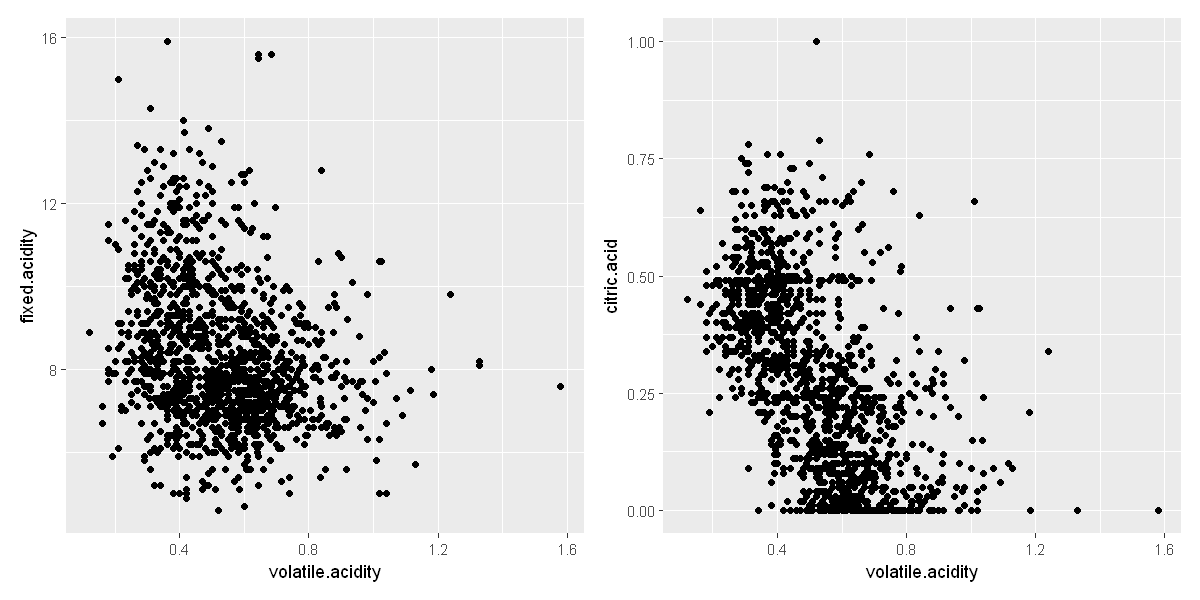

In [406]:
p1 <- ggplot(df, aes(x = volatile.acidity, y = fixed.acidity)) +
    geom_point()
p2 <- ggplot(df, aes(x = volatile.acidity, y = citric.acid)) +
    geom_point()
options(repr.plot.width=10, repr.plot.height=5)
p1 + p2

Można zaobserwować, że na wykresie po lewej, punkty są rozłożone raczej losowo i nie są w żaden sposób uporządkowane. Na wykrese po prawej, jeśli popatrzymy na największe zagęszczenie punktów, możemy zaobserwować, że wraz ze wzrostem 'volatile.acidity' maleje 'citric.acid'. Nie jest to jednak wyraźna korelacja

Wysoki wspołczynnik korelacji mamy jeszcze pomiędzy zmiennymi: 'free.sulfur.dioxide' i 'total.sulfur.dioxide'. Zgadza się to z intuicją, ponieważ częścią wszystkich postaci SO2, są te w postaci wolnej.

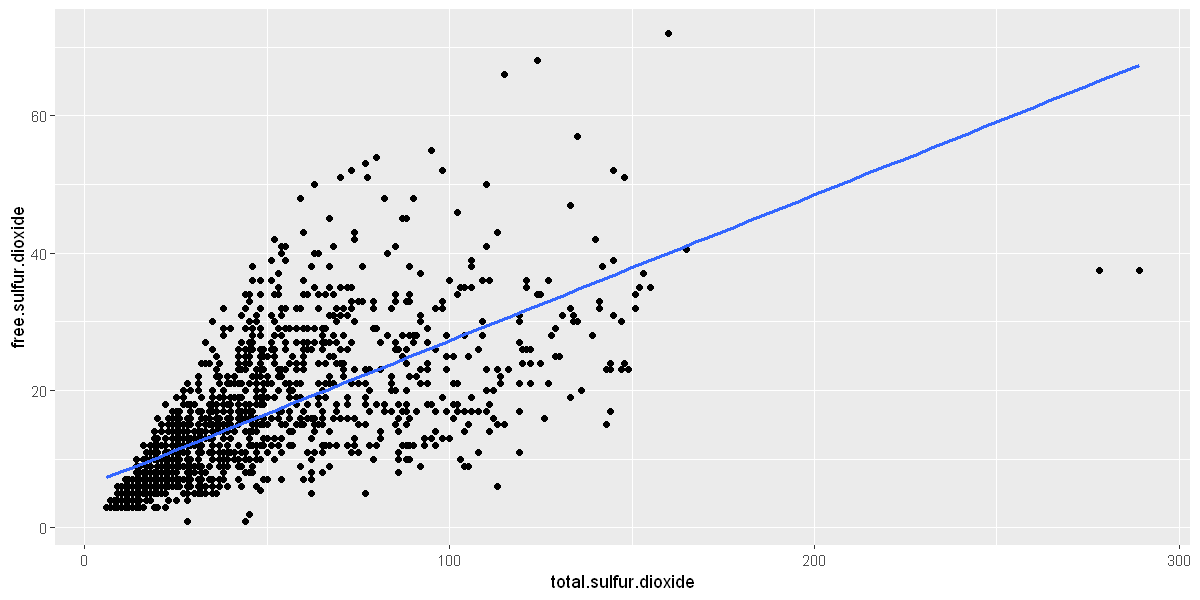

In [407]:
ggplot(df, aes(x = total.sulfur.dioxide, y = free.sulfur.dioxide)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

Patrząc na wykres, zależność wydaję się być bardzo wyraźna.

## 4. Wartości odstające

In [408]:
library("outForest")
outliersDF <- outForest(df)
dim(outliers(outliersDF))


Outlier identification by random forests

  Variables to check:		fixed.acidity, volatile.acidity, citric.acid, residual.sugar, chlorides, free.sulfur.dioxide, total.sulfur.dioxide, density, pH, sulphates, alcohol, quality
  Variables used to check:	fixed.acidity, volatile.acidity, citric.acid, residual.sugar, chlorides, free.sulfur.dioxide, total.sulfur.dioxide, density, pH, sulphates, alcohol, quality

  Checking: fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density  pH  sulphates  alcohol  quality  

[1] 277   8

Algorytm szukający wartości odstających znalazł je w każdej kolumnie. Łącznie było ich 280 z 1599 obserwacji. Taka analiza wartości odstających za dużo nam nie daje. Poszukajmy zatem ręcznie, kilku przykładowych, wybitnie odstających wartości.

#### 1. volatile acidity

Większość wartości w 'volatile.acidity', jest mniejsza niż 1, a wartość maksymalna wynosi 1.58, znajdźmy obserwację, dla której volatile acidity przyjmuje najwyższą wartość.

In [409]:
df  %>% filter(volatile.acidity == 1.58)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.6,1.58,0,2.1,0.137,5,9,0.99476,3.5,0.4,10.9,3


Analizując tę obserwację możemy zauważyć, że to konkretne wino ma niską zawratość SO2 (w każdej postaci). Jeśli popatrzymy na zawartość wszelkich siarczanów, to te wino ma ich wyjątkowo mało. Warto zauważyć, że zostało ono ocenione jako bardzo złej jakości. Reszta wartości jest w normie.

#### 2. citric acid

Zdacydowana większość obserwacji jest mniejsza od 0.5, jest jednak obserwacja, która przyjmuje wartość 1.

In [410]:
df  %>% filter(citric.acid == 1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
9.2,0.52,1,3.4,0.61,32,69,0.9996,2.74,2,9.4,4


Wino to ma kilka odstających parametrów. Poza wysoką zawartością kwasu cytrynowego, wino ma niezwykle wiele chlorków. Poziom siarczanów też jest bardzo wysoki (jest na poziomie 2, kiedy mediana wynosi 0.62). Jakość wina z takimi parametrami została oceniona na 4, co oznacza, że jest raczej słabe.

#### 3. free sulfur dioxide

W oczy rzuca się również obserwacja, która osiąga maksimum w kolumnie 'free.sulfur.dioxide'. Kiedy większość obserwacji jest z przedziału 5-30, ta osiąga wartość 72.

In [411]:
df  %>% filter(free.sulfur.dioxide == 72)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
5.9,0.29,0.25,13.4,0.067,72,160,0.99721,3.33,0.54,10.3,6


Wino to, ma również wybitnie dużo cukrów. Jest niewiele obserwacji, w których cukier jest większy od 10, tu jest 13.4. Wino ma również dużo SO2 we wszelkiej postacji, bo kolumna 'total.sulfur.dioxide' wynosi 160, ale nie jest to skrajna wartość (Jest wino, które w tej kolumnie osiąga nawet 289). Ocena jakości tego wina, wynosi 6.

## 5. Wnioski?

Podejmiemy teraz próbę ustalenia, od czego zależy jakość win z powyższej ramki danych. Narysujemy zależności wszelkich zmiennych od kolumny 'quality'.

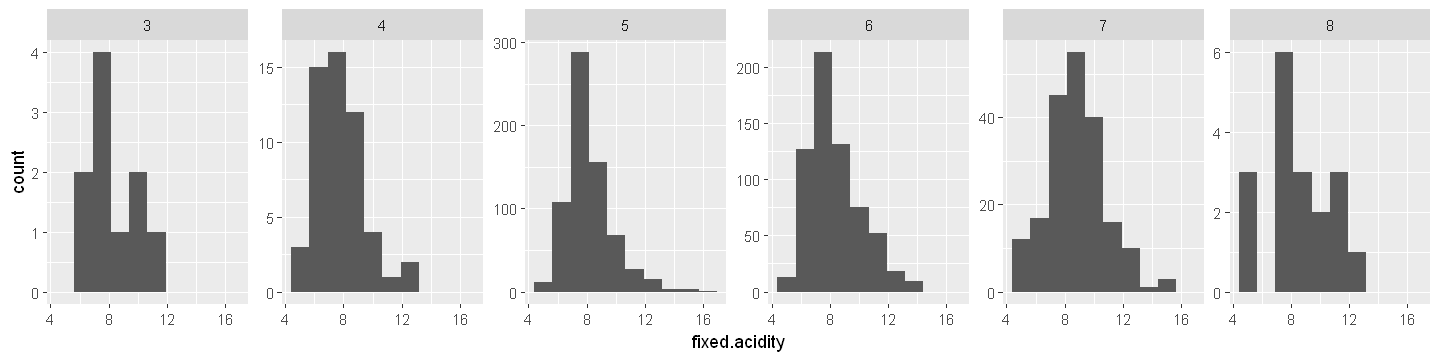

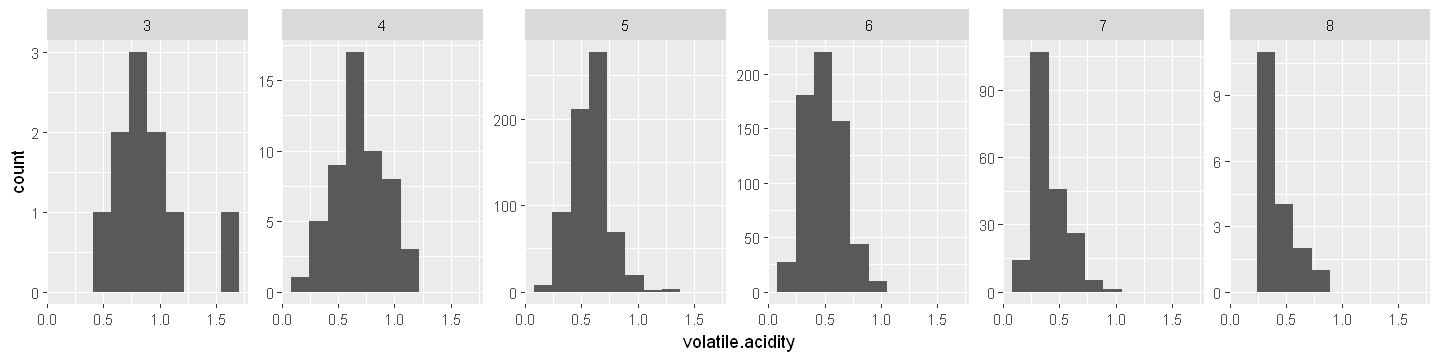

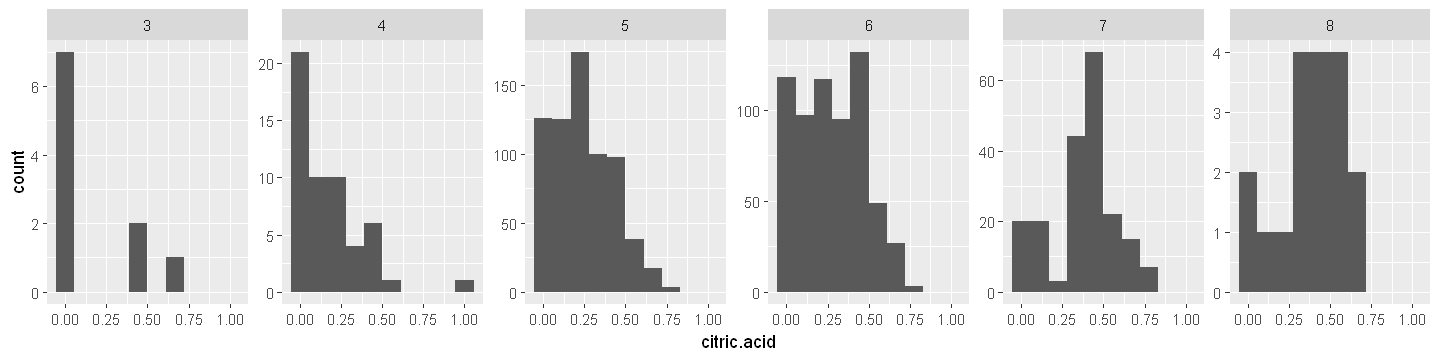

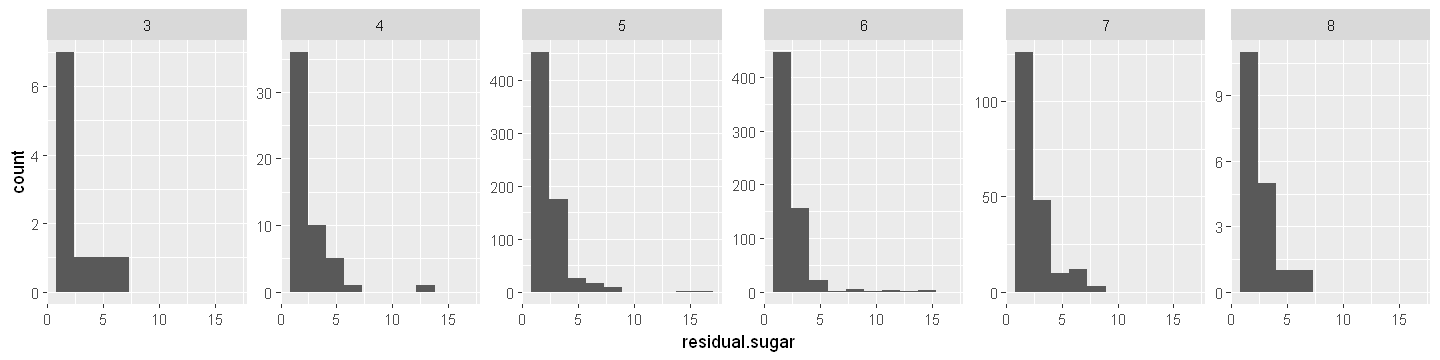

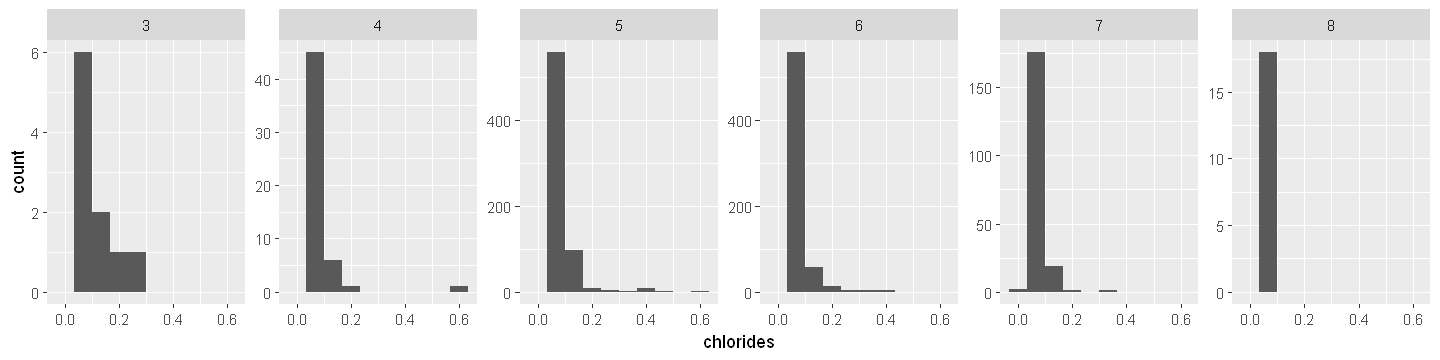

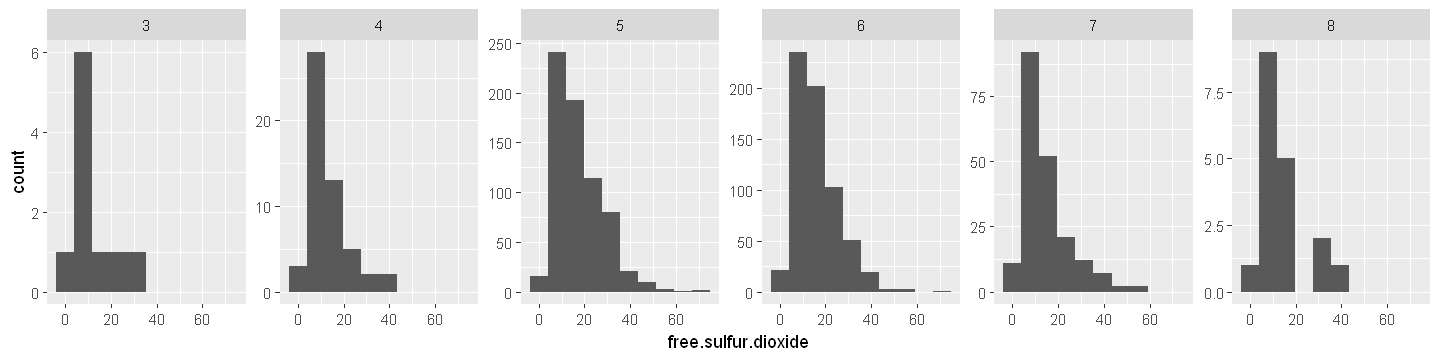

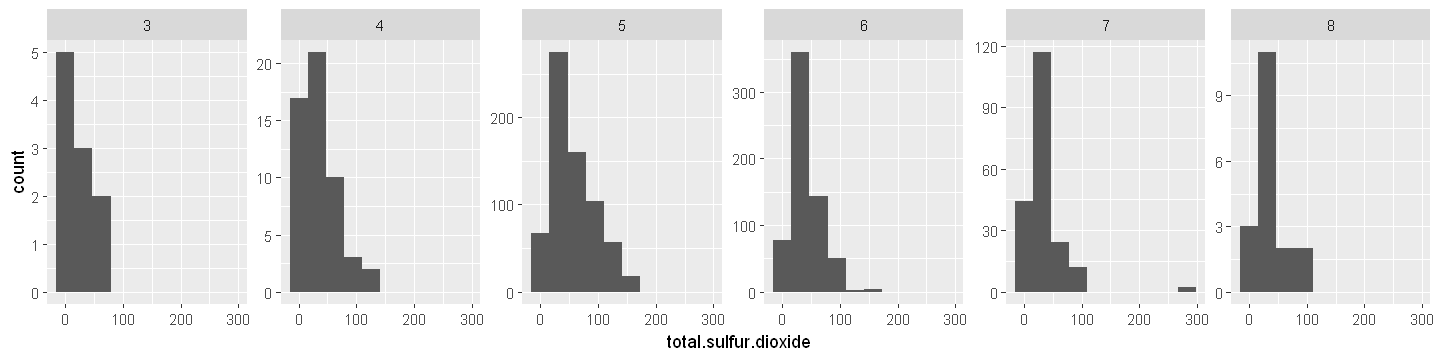

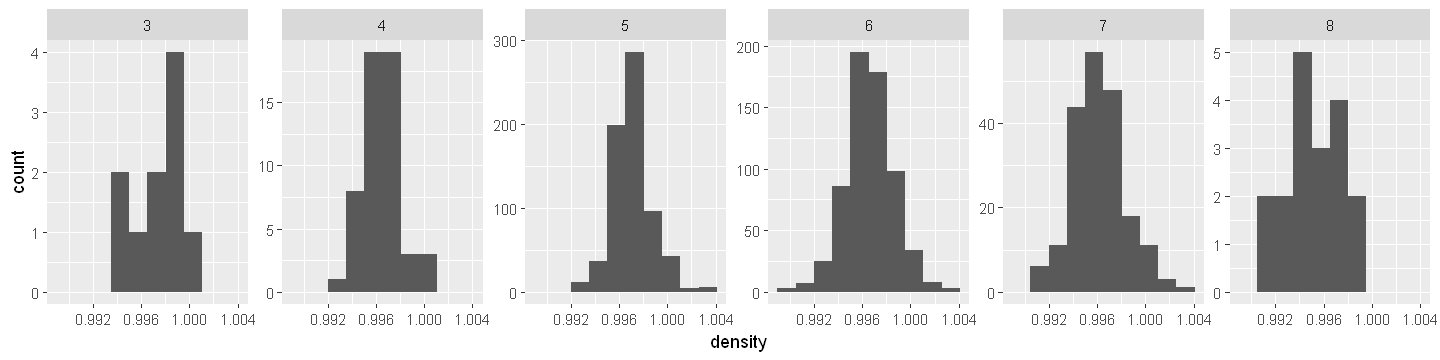

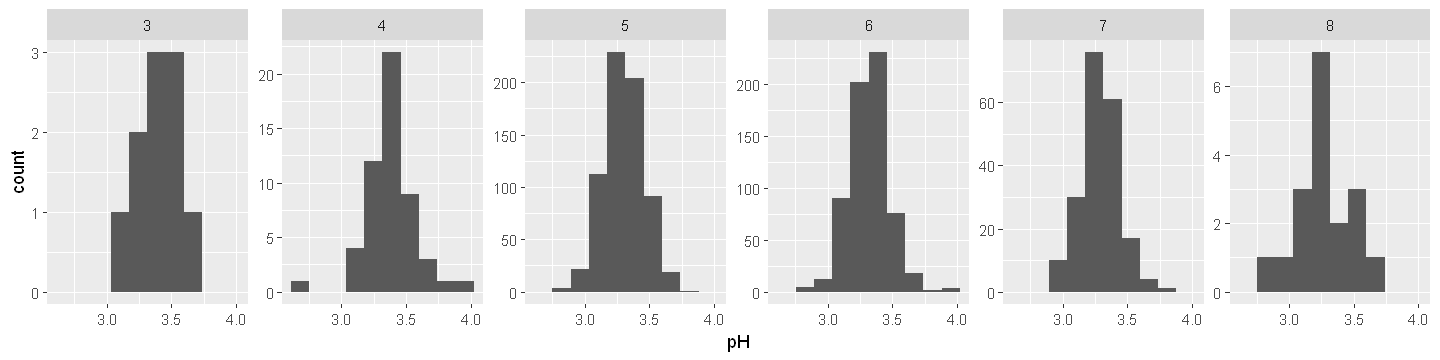

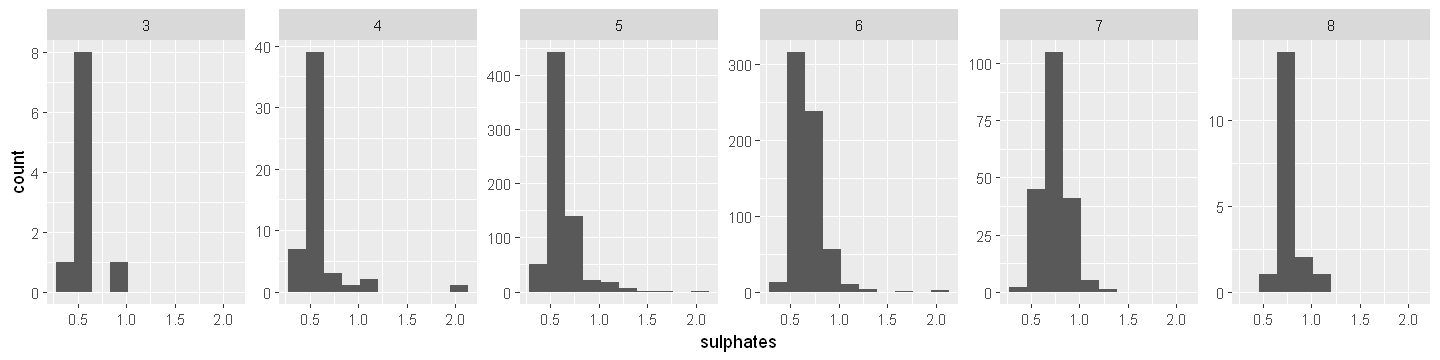

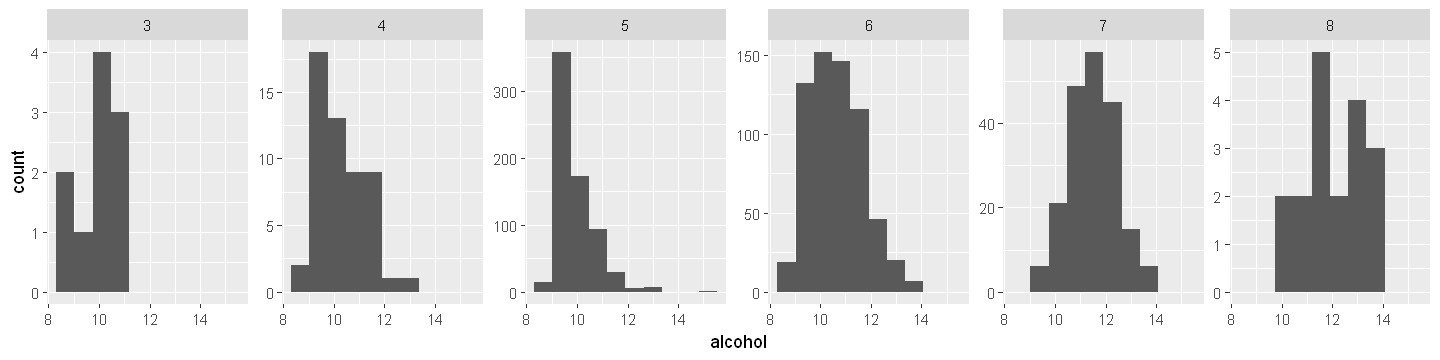

In [412]:
options(repr.plot.width=12, repr.plot.height=3)

for (i in 1:(ncol(df)-1)){
    p <- ggplot(df, aes(x = df[ ,i])) +
            geom_histogram(bins = 10) +
            facet_wrap(.~quality, scales='free_y', nrow = 1, ncol = 6) +
            labs(
                x = colnames(df)[i]
            )
    print(p)
}

Bardzo ciężko z takiej ilości zmiennych wyciągnąć ręcznie sensowne wnioski. Możemy jednak zauważyć, że im wina były lepiej oceniane, tym wykres kwasów lotnych w winie, przesuwa sie bardziej w lewo. Może to sugerować, że im tych kwasów mniej, tym wino lepsze. Histogram kwasu cytrynowego, wydaje się natomiast przesuwać w prawo, więc im go więcej tym lepsza jakość wina. Wszystkie najlepiej oceniane wina dążą do jak najmniejszej zawartości chlorków, te najgorsze natomiast, zawierają ich najwięcej.

Należy pamiętać, że powyższe wnioski, wynikają z analizy wykresów "na oko". Należy je traktować raczej jako sugestię niż pewnik.